# IMPORT LIBRARIES

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# Load dataset
df = pd.read_csv('new_framingham.csv')


In [3]:
# LOAD a copy dataset
df0 = pd.read_csv('new_framingham.csv')

In [4]:
df.head(2)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days
0,Male,39,post grad,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days
1,Female,46,Secondary Edu,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days


In [5]:
# Drop Age Columns
df.drop(columns=['age'], axis=0, inplace=True)

# CLEAN THE DATA

In [6]:
# convert gender to numerical value

# for i, gender in enumerate(df['male']):
#     #print(gender)
#     if gender == 'Male':
#         df['male'][i] = 0
#     elif gender == 'Female':
#         df['male'][i] = 1

In [7]:
df.head(3)

,male,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days
0,Male,post grad,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days
1,Female,Secondary Edu,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days
2,Male,Primary Edu,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days


In [8]:
# df['male'].apply(change_value)

In [9]:
df.head()

,male,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days
0,Male,post grad,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days
1,Female,Secondary Edu,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days
2,Male,Primary Edu,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days
3,Female,Tertiary Edu,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes,22265 days
4,Female,Tertiary Edu,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No,16790 days


In [10]:
# Using lambda and `.replace` to change the values of gender
# replacement = {'Female':0, 'Male':1}
# df['male'].replace({'Female':0, 'Male':1})
df['gender'] = df['male'].apply(lambda x: 1 if x=='Male' else 0)

In [11]:
df.head(2)

,male,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender
0,Male,post grad,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days,1
1,Female,Secondary Edu,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days,0


In [12]:
# The male column is dropped because gender is now created 

df.drop(columns=['male'], axis=1, inplace=True)

In [13]:
df.head()

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender
0,post grad,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days,1
1,Secondary Edu,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days,0
2,Primary Edu,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days,1
3,Tertiary Edu,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes,22265 days,0
4,Tertiary Edu,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No,16790 days,0


### Changing the value of Education column

In [14]:
# Check Education to see what it look like

df['education']

0           post grad
1       Secondary Edu
2         Primary Edu
3        Tertiary Edu
4        Tertiary Edu
            ...      
4235    Secondary Edu
4236      Primary Edu
4237    Secondary Edu
4238     Tertiary Edu
4239     Tertiary Edu
Name: education, Length: 4240, dtype: object

In [15]:
# Changing the education with Lambda

df['education'] = df['education'].apply(lambda x: 1 if x == 'Primary Edu' else 2 if x == 'Secondary Edu' else 3 if x == 'Tertiary Edu' else 4)

In [16]:
df.head(3)

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender
0,4,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days,1
1,2,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days,0
2,1,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days,1


In [17]:
replace={'No':0, 'Yes':1}

### Changing the CurrentSmoker Column

In [18]:
# changing the current smoker with `map` method

df['currentSmoker'] = df.currentSmoker.map({'No':0, 'Yes':1})

In [19]:
# changing the current smoker with `replace` method


df['BPMeds'] = df['BPMeds'].replace('No', 0)
df['BPMeds'] = df['BPMeds'].replace('Yes', 1)

In [20]:
# CHECKING THE BPMeds

df.BPMeds

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4235    NaN
4236    0.0
4237    0.0
4238    0.0
4239    0.0
Name: BPMeds, Length: 4240, dtype: float64

In [21]:
df.head()

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender
0,4,0,0.0,0.0,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days,1
1,2,0,0.0,0.0,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days,0
2,1,1,20.0,0.0,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days,1
3,3,1,30.0,0.0,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes,22265 days,0
4,3,1,23.0,0.0,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No,16790 days,0


In [22]:
# Changing the prevalentHyp with Lambda

df['prevalentHyp']=df.prevalentHyp.apply(lambda hajarat: 1 if hajarat == 'Yes' else 0)

In [23]:
df.tail(3)

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender
4237,2,0,0.0,0.0,No,0,No,269.0,133.5,83.0,21.47,80.0,107.0,No,18980 days,0
4238,3,0,0.0,0.0,No,1,No,185.0,141.0,98.0,25.60,67.0,72.0,No,14600 days,1
4239,3,1,30.0,0.0,No,0,No,196.0,133.0,86.0,20.91,85.0,80.0,No,14235 days,0


In [24]:
## Changing the prevalentStoke with Lambda

df['prevalentStroke']=df.prevalentStroke.apply(lambda tosin: 1 if tosin == "Yes" else 0)

In [25]:
# Check pravelence of stroke t omake sure it has 1

df[df['prevalentStroke'] == 1]

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender
255,1,0,0.0,1.0,1,1,No,252.0,189.0,110.0,28.77,54.0,70.0,No,21900 days,0
475,3,1,15.0,0.0,1,0,No,161.0,116.0,74.5,19.82,80.0,90.0,No,19345 days,1
646,2,0,0.0,0.0,1,0,No,224.0,127.5,81.0,20.39,80.0,90.0,No,13870 days,1
763,1,0,0.0,0.0,1,1,Yes,267.0,157.0,94.0,33.32,92.0,205.0,Yes,21170 days,0
1044,1,0,0.0,NaN,1,1,No,290.0,144.0,64.0,21.41,58.0,145.0,Yes,23725 days,0
1553,1,1,15.0,0.0,1,1,No,285.0,155.0,90.0,30.42,70.0,77.0,Yes,24455 days,1
1624,1,0,0.0,0.0,1,1,No,107.0,143.0,93.0,NaN,68.0,62.0,Yes,25550 days,0
1975,1,1,20.0,0.0,1,1,No,213.0,163.0,94.0,NaN,76.0,69.0,Yes,22995 days,1
2036,2,0,0.0,0.0,1,0,No,321.0,150.0,93.0,22.50,75.0,131.0,No,19710 days,0
2204,2,1,20.0,0.0,1,1,No,260.0,158.0,96.0,21.17,74.0,82.0,No,18980 days,1


In [26]:
df.head(3)

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender
0,4,0,0.0,0.0,0,0,No,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days,1
1,2,0,0.0,0.0,0,0,No,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days,0
2,1,1,20.0,0.0,0,0,No,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days,1


In [27]:
## Changing the diabetes with Lambda

df.diabetes

0       No
1       No
2       No
3       No
4       No
        ..
4235    No
4236    No
4237    No
4238    No
4239    No
Name: diabetes, Length: 4240, dtype: object

In [28]:
## Changing the diabetes with Lambda

df.diabetes.apply(lambda patience:1 if patience =='Yes' else 0)

0       0
1       0
2       0
3       0
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: diabetes, Length: 4240, dtype: int64

In [29]:
df.head()

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender
0,4,0,0.0,0.0,0,0,No,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days,1
1,2,0,0.0,0.0,0,0,No,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days,0
2,1,1,20.0,0.0,0,0,No,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days,1
3,3,1,30.0,0.0,0,1,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes,22265 days,0
4,3,1,23.0,0.0,0,0,No,285.0,130.0,84.0,23.10,85.0,85.0,No,16790 days,0


In [30]:
## Changing the diabetes with Lambda

df["diabetes"]=df.diabetes.apply(lambda patience:1 if patience =='Yes' else 0)

In [31]:
df.head(3)

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender
0,4,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days,1
1,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days,0
2,1,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days,1


### CHECKING TOTAL CHOLESTEROL OUT

<Axes: >

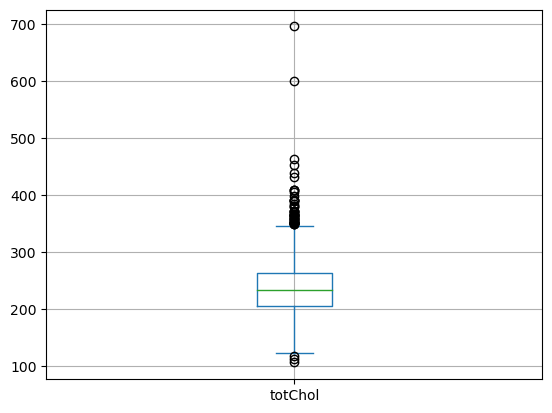

In [32]:
df['totChol'].plot(kind='box', grid=True)                                   


In [33]:
df.totChol.describe()

count    4190.000000
mean      236.699523
std        44.591284
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: totChol, dtype: float64

In [34]:
## Capping the outlires in totChols to 263 using Lambda

df['totChol'] = df.totChol.apply(lambda x: x if x < 263 else 263)

<Axes: >

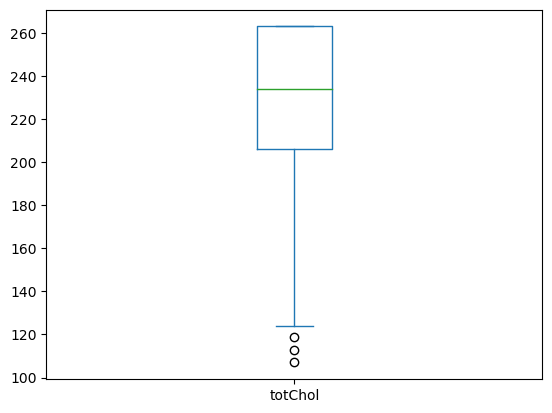

In [35]:
# Checking box plot after capping

df['totChol'].plot(kind='box')

In [36]:
import seaborn as sns

<Axes: xlabel='totChol', ylabel='Count'>

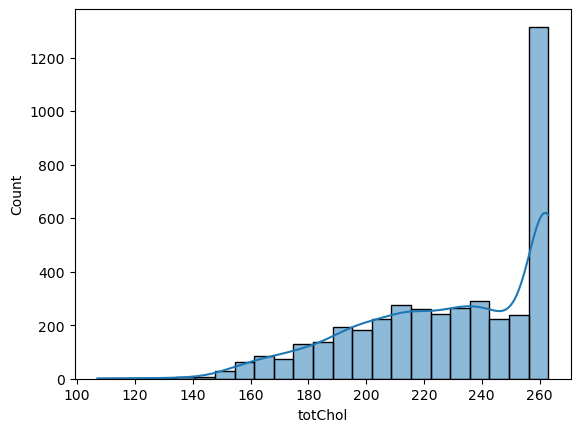

In [37]:
# Checking the histogram after capping

sns.histplot(df['totChol'], kde=True)

### CHECKING `cigsPerDay` out

<Axes: xlabel='cigsPerDay', ylabel='Count'>

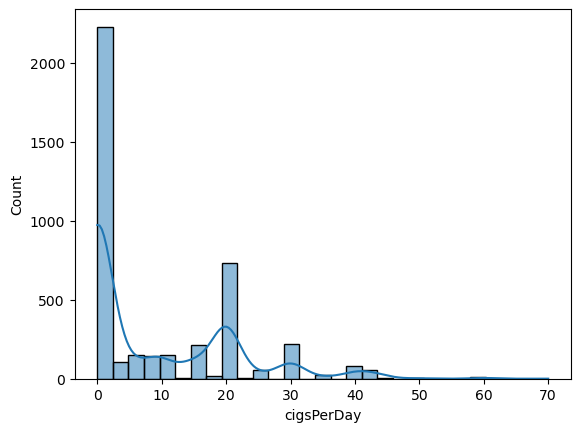

In [38]:
sns.histplot(df0['cigsPerDay'], kde=True)

C:\Users\User pc\AppData\Local\Temp\ipykernel_15392\528993863.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df0['totChol'], hist=True,kde=True)


<Axes: xlabel='totChol', ylabel='Density'>

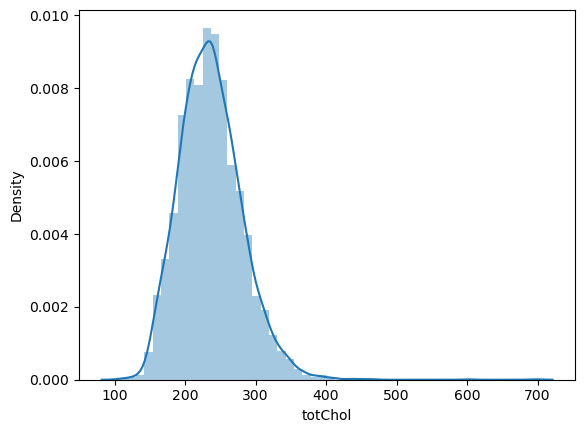

In [39]:
sns.distplot(df0['totChol'], hist=True,kde=True)

In [40]:
df.head(2)

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender
0,4,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days,1
1,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days,0


In [41]:
df['sysBP'].describe()

count    4240.000000
mean      132.354599
std        22.033300
min        83.500000
25%       117.000000
50%       128.000000
75%       144.000000
max       295.000000
Name: sysBP, dtype: float64

<Axes: >

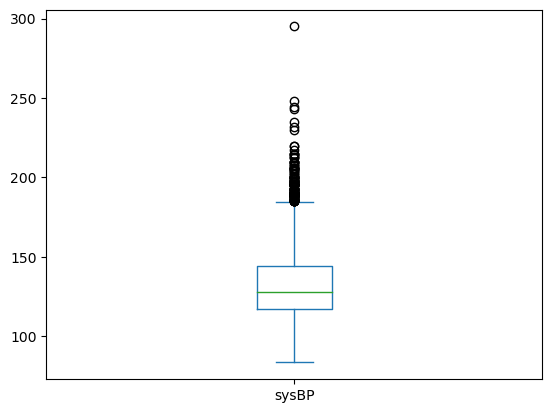

In [42]:
df.sysBP.plot(kind='box')

In [43]:
df['sysBP'] = df['sysBP'].apply(lambda x: x if x < 150 else 150)

In [44]:
df['sysBP'].describe()

count    4240.000000
mean      128.954599
std        15.389459
min        83.500000
25%       117.000000
50%       128.000000
75%       144.000000
max       150.000000
Name: sysBP, dtype: float64

In [45]:
df['diaBP'].describe()

count    4240.000000
mean       82.897759
std        11.910394
min        48.000000
25%        75.000000
50%        82.000000
75%        90.000000
max       142.500000
Name: diaBP, dtype: float64

<Axes: >

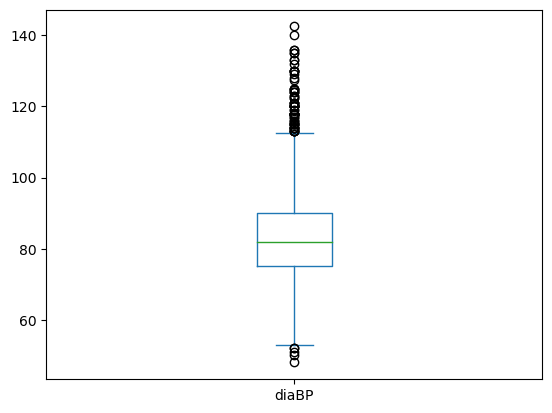

In [46]:
df.diaBP.plot(kind='box')

In [47]:
df.head(3)

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender
0,4,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days,1
1,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days,0
2,1,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days,1


### CHECKING `age_in_days` out

In [48]:
# Strip days from `age_in_days`

df['age_in_days'].str.strip('days')

0       14235 
1       16790 
2       17520 
3       22265 
4       16790 
         ...  
4235    17520 
4236    16060 
4237    18980 
4238    14600 
4239    14235 
Name: age_in_days, Length: 4240, dtype: object

In [49]:
#assigning the value to days

df['days'] = df['age_in_days'].str.strip('days')

In [50]:
df.head(3)

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender,days
0,4,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days,1,14235
1,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days,0,16790
2,1,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days,1,17520


In [51]:
# type CASTING
df['days'] = df['days'].astype(int)

In [52]:
# Defining age

df['age'] = df['days']//365

In [53]:
df.head()

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender,days,age
0,4,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days,1,14235,39
1,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days,0,16790,46
2,1,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days,1,17520,48
3,3,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,Yes,22265 days,0,22265,61
4,3,1,23.0,0.0,0,0,0,263.0,130.0,84.0,23.10,85.0,85.0,No,16790 days,0,16790,46


# Another method to achive the result above using `split` method

In [54]:
df['age_in_days'].str.split(" ", expand=True)[0]

0       14235
1       16790
2       17520
3       22265
4       16790
        ...  
4235    17520
4236    16060
4237    18980
4238    14600
4239    14235
Name: 0, Length: 4240, dtype: object

In [55]:
df['age_in_days'].str.split(" ", expand=True)[0]

0       14235
1       16790
2       17520
3       22265
4       16790
        ...  
4235    17520
4236    16060
4237    18980
4238    14600
4239    14235
Name: 0, Length: 4240, dtype: object

In [56]:
df

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender,days,age
0,4,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days,1,14235,39
1,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days,0,16790,46
2,1,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days,1,17520,48
3,3,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,Yes,22265 days,0,22265,61
4,3,1,23.0,0.0,0,0,0,263.0,130.0,84.0,23.10,85.0,85.0,No,16790 days,0,16790,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,2,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No,17520 days,0,17520,48
4236,1,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No,16060 days,0,16060,44
4237,2,0,0.0,0.0,0,0,0,263.0,133.5,83.0,21.47,80.0,107.0,No,18980 days,0,18980,52
4238,3,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,No,14600 days,1,14600,40


In [57]:
df.describe()

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,gender,days,age
count,4240.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000,4240.000000,4240.000000
mean,2.029481,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,229.171934,128.954599,82.897759,25.800801,75.878981,81.963655,0.429245,18096.768868,49.580189
std,1.054911,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,31.597140,15.389459,11.910394,4.079840,12.025348,23.954335,0.495027,3129.123894,8.572942
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000,11680.000000,32.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000,15330.000000,42.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000,17885.000000,49.000000
75%,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,1.000000,20440.000000,56.000000
max,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,263.000000,150.000000,142.500000,56.800000,143.000000,394.000000,1.000000,25550.000000,70.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   education        4240 non-null   int64  
 1   currentSmoker    4240 non-null   int64  
 2   cigsPerDay       4211 non-null   float64
 3   BPMeds           4187 non-null   float64
 4   prevalentStroke  4240 non-null   int64  
 5   prevalentHyp     4240 non-null   int64  
 6   diabetes         4240 non-null   int64  
 7   totChol          4240 non-null   float64
 8   sysBP            4240 non-null   float64
 9   diaBP            4240 non-null   float64
 10  BMI              4221 non-null   float64
 11  heartRate        4239 non-null   float64
 12  glucose          3852 non-null   float64
 13  TenYearCHD       4240 non-null   object 
 14  age_in_days      4240 non-null   object 
 15  gender           4240 non-null   int64  
 16  days             4240 non-null   int32  
 17  age           

In [59]:
df

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender,days,age
0,4,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days,1,14235,39
1,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days,0,16790,46
2,1,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days,1,17520,48
3,3,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,Yes,22265 days,0,22265,61
4,3,1,23.0,0.0,0,0,0,263.0,130.0,84.0,23.10,85.0,85.0,No,16790 days,0,16790,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,2,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No,17520 days,0,17520,48
4236,1,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No,16060 days,0,16060,44
4237,2,0,0.0,0.0,0,0,0,263.0,133.5,83.0,21.47,80.0,107.0,No,18980 days,0,18980,52
4238,3,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,No,14600 days,1,14600,40


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # 1
from sklearn.metrics import confusion_matrix,roc_curve,auc, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier # 2
from sklearn.linear_model import LogisticRegression# 3
import matplotlib.pyplot as plt

In [61]:
df.head(3)

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender,days,age
0,4,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days,1,14235,39
1,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days,0,16790,46
2,1,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days,1,17520,48


In [62]:
df

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender,days,age
0,4,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days,1,14235,39
1,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days,0,16790,46
2,1,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days,1,17520,48
3,3,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,Yes,22265 days,0,22265,61
4,3,1,23.0,0.0,0,0,0,263.0,130.0,84.0,23.10,85.0,85.0,No,16790 days,0,16790,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,2,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No,17520 days,0,17520,48
4236,1,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No,16060 days,0,16060,44
4237,2,0,0.0,0.0,0,0,0,263.0,133.5,83.0,21.47,80.0,107.0,No,18980 days,0,18980,52
4238,3,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,No,14600 days,1,14600,40


In [63]:
## Changing the TenYearCHD with Lambda

df["TenYearCHD"] = df.TenYearCHD.apply(lambda patience:1 if patience =='Yes' else 0)

In [64]:
df

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender,days,age
0,4,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,14235 days,1,14235,39
1,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,16790 days,0,16790,46
2,1,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,17520 days,1,17520,48
3,3,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,22265 days,0,22265,61
4,3,1,23.0,0.0,0,0,0,263.0,130.0,84.0,23.10,85.0,85.0,0,16790 days,0,16790,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,2,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0,17520 days,0,17520,48
4236,1,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0,16060 days,0,16060,44
4237,2,0,0.0,0.0,0,0,0,263.0,133.5,83.0,21.47,80.0,107.0,0,18980 days,0,18980,52
4238,3,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0,14600 days,1,14600,40


In [65]:
# X  = df.drop(columns=['TenYearCHD'], axis=0)
# y = df.TenYearCHD

In [66]:
print 

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [67]:
df["age_in_days"].str.split (" ", expand = True)[1]

0       days
1       days
2       days
3       days
4       days
        ... 
4235    days
4236    days
4237    days
4238    days
4239    days
Name: 1, Length: 4240, dtype: object

In [68]:
df.head()

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender,days,age
0,4,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,14235 days,1,14235,39
1,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,16790 days,0,16790,46
2,1,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,17520 days,1,17520,48
3,3,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,22265 days,0,22265,61
4,3,1,23.0,0.0,0,0,0,263.0,130.0,84.0,23.10,85.0,85.0,0,16790 days,0,16790,46


In [69]:
replacement = {'No':0, 'Yes':1}

df0.currentSmoker.replace(replacement)

0       0
1       0
2       1
3       1
4       1
       ..
4235    1
4236    1
4237    0
4238    0
4239    1
Name: currentSmoker, Length: 4240, dtype: int64

In [70]:
df

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender,days,age
0,4,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,14235 days,1,14235,39
1,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,16790 days,0,16790,46
2,1,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,17520 days,1,17520,48
3,3,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,22265 days,0,22265,61
4,3,1,23.0,0.0,0,0,0,263.0,130.0,84.0,23.10,85.0,85.0,0,16790 days,0,16790,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,2,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0,17520 days,0,17520,48
4236,1,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0,16060 days,0,16060,44
4237,2,0,0.0,0.0,0,0,0,263.0,133.5,83.0,21.47,80.0,107.0,0,18980 days,0,18980,52
4238,3,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0,14600 days,1,14600,40


In [71]:
df.head(3)

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,gender,days,age
0,4,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,14235 days,1,14235,39
1,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,16790 days,0,16790,46
2,1,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,17520 days,1,17520,48


In [72]:
df.columns

Index(['education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'age_in_days', 'gender', 'days',
       'age'],
      dtype='object')

In [73]:
df = df.drop(columns=['days'], axis=0)

In [74]:
df = df.drop(columns=['age_in_days'], axis=0)

In [75]:
df.head(2)

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender,age
0,4,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,39
1,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,46


# Creating X-input and y-output

In [76]:
df.head(2)

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender,age
0,4,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,39
1,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,46


In [77]:
X  = df.drop(columns=['TenYearCHD'], axis=0)
y = df.TenYearCHD.apply(lambda x: 1 if x== "Yes" else 0)

In [78]:
X.head()

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,gender,age
0,4,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,1,39
1,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,46
2,1,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,1,48
3,3,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,0,61
4,3,1,23.0,0.0,0,0,0,263.0,130.0,84.0,23.10,85.0,85.0,0,46


# Spliting our data into Training and Testing

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.20, random_state=42)
# train_test_split()

In [81]:
# Checking the shape of the `X_train`,`X_test`, `y_train` and `y_test`

print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (3392, 15)
X_test shape:  (848, 15)
y_train shape:  (3392,)
y_test shape:  (848,)


# TRAINING THE MACHINE LEARNING MODEL

In [82]:
# DECISION TREE CLASSIFIER
dtc = DecisionTreeClassifier()

In [86]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

# EVALUATING THE MODEL

In [84]:
dtc.score(X_test, y_test)

1.0

In [87]:
dtc.score(X_train, y_train)

1.0